# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
iowa_data = pd.read_csv('data/iowa.csv')
iowa_data


,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50


I'd say the most profitable item is the one that has the highest profit, so combining the Profit per bottle with total bottle sales. So with this dataset, I'd say it would be
(StatebottleRetail-StateBottleCost)*Bottles solds

In [3]:
iowa_data['profitability'] = (
    ((iowa_data['State Bottle Retail'] - iowa_data['State Bottle Cost']) 
     * iowa_data['Bottles Sold'])
    .groupby(iowa_data['Item Description']).transform('sum')
)
iowa_data.head().T


,0,1,2,3,4
Invoice/Item Number,INV-59108400026,S16879800057,INV-05301100019,INV-40973500083,INV-17022500013
Date,06/06/2023,01/16/2014,06/05/2017,10/14/2021,01/18/2019
Store Number,3723,3926,3829,5102,2560
Store Name,J D SPIRITS LIQUOR,LIQUOR DOWNTOWN / IOWA CITY,GARY'S FOODS / MT VERNON,WILKIE LIQUORS,HY-VEE FOOD STORE / MARION
Zip Code,51040,52240,52314,52314,52302
Category Name,STRAIGHT RYE WHISKIES,VODKA 80 PROOF,CANADIAN WHISKIES,AMERICAN SCHNAPPS,WHISKEY LIQUEUR
Vendor Name,INFINIUM SPIRITS,HEAVEN HILL BRANDS,DIAGEO AMERICAS,JIM BEAM BRANDS,SAZERAC COMPANY INC
Item Number,27102,35416,11296,82787,64863
Item Description,TEMPLETON RYE 4YR,BURNETT'S VODKA 80 PRF,CROWN ROYAL,DEKUYPER BUTTERSHOTS,FIREBALL CINNAMON WHISKEY
Bottle Volume (ml),750,750,750,1000,200


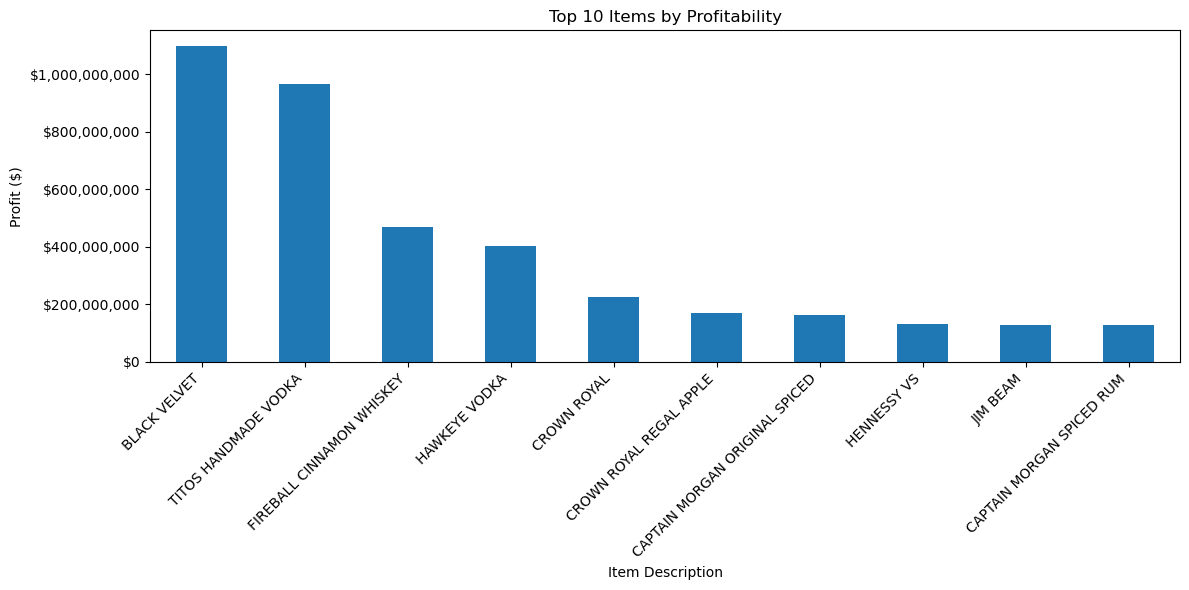

In [4]:

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

profit_by_item = (
    iowa_data.groupby('Item Description')['profitability']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

ax = profit_by_item.plot(kind='bar', figsize=(12,6))
ax.set_title("Top 10 Items by Profitability")
ax.set_ylabel("Profit ($)")
ax.set_xlabel("Item Description")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [5]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [6]:
print(x.reshape(-1,1)-y.reshape(1,-1))
print(x.reshape(1,-1)-y.reshape(-1,1))
res1 = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        res1[i,j] = x[i] - y[j]
print(res1)
res2 = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        res2[i,j] = x[j] - y[i]
print(res2)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]
[[-1  1  3]
 [-4 -2  0]]
[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


-When you try and subtract them it gives a value error: operands could not be broadcast together with shapes (3,) (2,) 
-It gives an array with the subtracted value
-It gives the same array but its rotated/flipped
-What they do is rotate the x array, so originally x is 0 row with 3 columns. When you do x.reshape(1,-1), what it does is adjust the array to say that x actually does have a column so that it can better handle the math. The other reshape rotates x so now it has 3 rows with 1 columns



3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

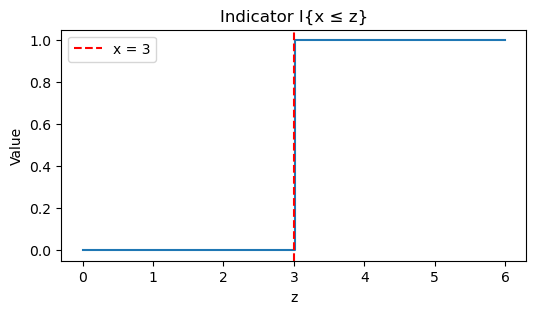

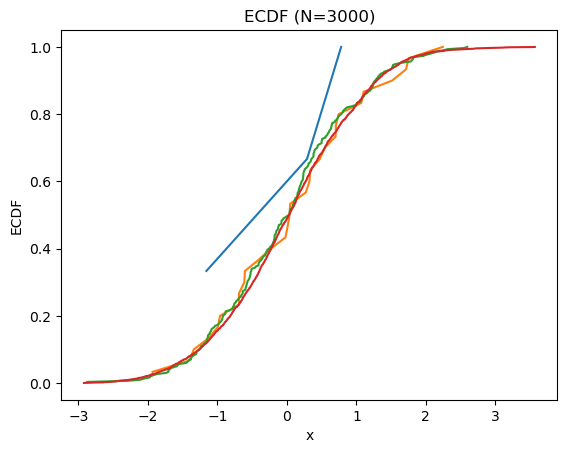

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_indicator(x=3):
    z = np.linspace(0, 6, 200)
    I = (x <= z).astype(int)
    plt.figure(figsize=(6,3))
    plt.step(z, I, where='post')
    plt.axvline(x, color='red', linestyle='--', label=f'x = {x}')
    plt.title('Indicator I{x ≤ z}')
    plt.xlabel('z')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_indicator()

rng = np.random.default_rng(100)
def plot_ecdf(X, N):
    X_sorted = np.sort(X)
    y = np.arange(1, N+1) / N
    sns.lineplot(x=X_sorted, y=y).set(
        title=f"ECDF (N={N})", xlabel="x", ylabel="ECDF"
    )

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    plot_ecdf(X, N)


As the sample size increases it becomes much smoother, the sample size of 3 is barely a line, and then most of the other ones aren't very smooth. Once it gets to 3000 it is almost perfectly smooth.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [60]:
def compute_quantile(q, F_hat, grid):
    idx = np.where(F_hat >= q)[0][0]   # first crossing
    return grid[idx]

def ecdf(data, plot=True):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1, n+1) / n
    if plot:
        import matplotlib.pyplot as plt
        plt.step(x, y, where="post")
        plt.xlabel("x")
        plt.ylabel("ECDF")
        plt.show()
    return y, x 

def quantile(x, q):
    F_hat, grid = ecdf(x,plot=False )
    return compute_quantile(q, F_hat, grid)

def iqr_and_whiskers(x, whisker_coef=1.5):
    q1 = quantile(x, 0.25)
    q2 = quantile(x, 0.50)
    q3 = quantile(x, 0.75)
    iqr = q3 - q1
    low = q1 - whisker_coef * iqr
    high = q3 + whisker_coef * iqr
    return {
        "Q1": q1,
        "Median": q2,
        "Q3": q3,
        "IQR": iqr,
        "WhiskerLow": low,
        "WhiskerHigh": high
    }
    
def is_outlier(x, whisker_coef=1.5):
    w = iqr_and_whiskers(x, whisker_coef)
    low, high = w["WhiskerLow"], w["WhiskerHigh"]
    return (x < low) | (x > high)


def five_number_summary(x):
    if len(x) == 0:
        return {
            "Min": float("nan"),
            "Q1": float("nan"),
            "Median": float("nan"),
            "Q3": float("nan"),
            "Max": float("nan")
        }
    return {
        "Min": float(np.min(x)),
        "Q1": quantile(x, 0.25),
        "Median": quantile(x, 0.50),
        "Q3": quantile(x, 0.75),
        "Max": float(np.max(x)),
    }


Five-number summary (custom):
{'Min': 21.93, 'Q1': np.float64(51.01), 'Median': np.float64(61.14), 'Q3': np.float64(69.83), 'Max': 96.29}

IQR + whiskers (custom):
{'Q1': np.float64(51.01), 'Median': np.float64(61.14), 'Q3': np.float64(69.83), 'IQR': np.float64(18.82), 'WhiskerLow': np.float64(22.779999999999998), 'WhiskerHigh': np.float64(98.06)}

Outliers detected: 1

Pandas describe():
count    1343.000000
mean       60.598079
std        12.966330
min        21.930000
25%        51.045000
50%        61.140000
75%        69.815000
max        96.290000
Name: Age at Diagnosis, dtype: float64


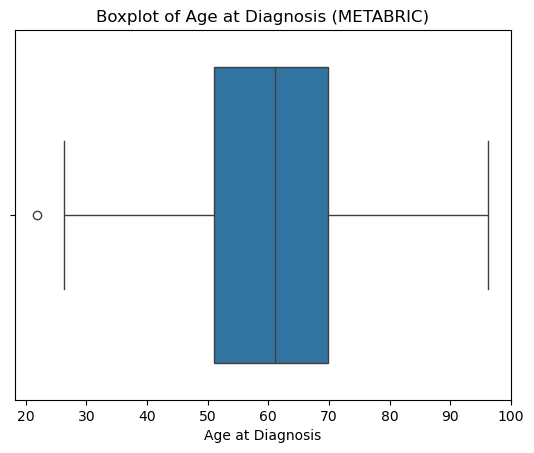

In [59]:
metabric_data = pd.read_csv("data/metabric.csv")

x = metabric_data["Age at Diagnosis"].dropna().values  # remove any NaNs

print("Five-number summary (custom):")
print(five_number_summary(x))

print("\nIQR + whiskers (custom):")
print(iqr_and_whiskers(x))

print("\nOutliers detected:", np.sum(is_outlier(x)))

print("\nPandas describe():")
print(df["Age at Diagnosis"].describe())

sns.boxplot(x=df["Age at Diagnosis"])
plt.title("Boxplot of Age at Diagnosis (METABRIC)")
plt.show()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

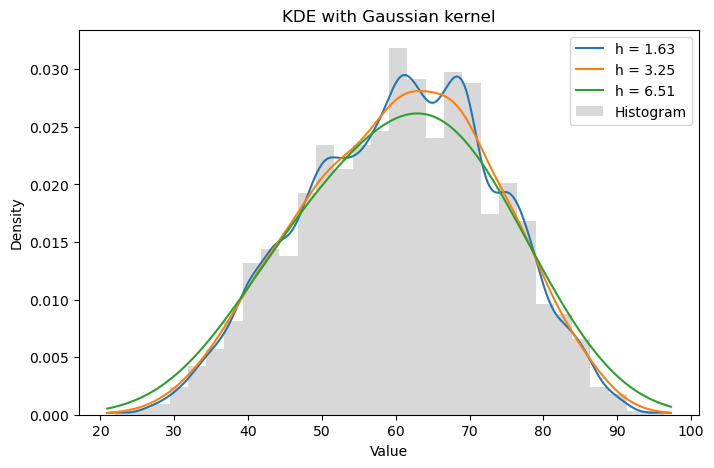

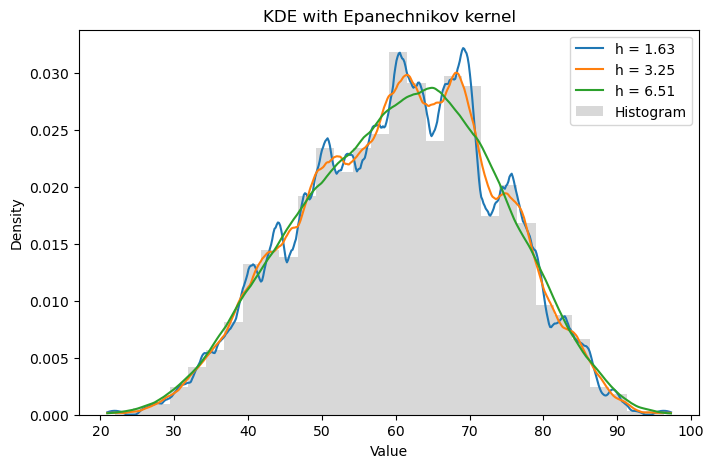

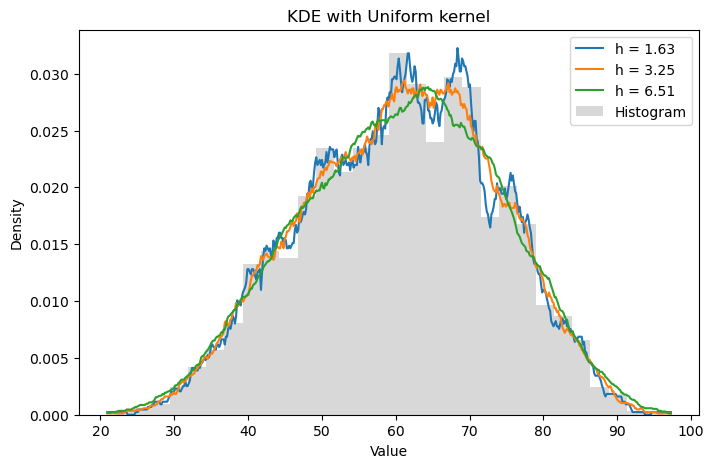

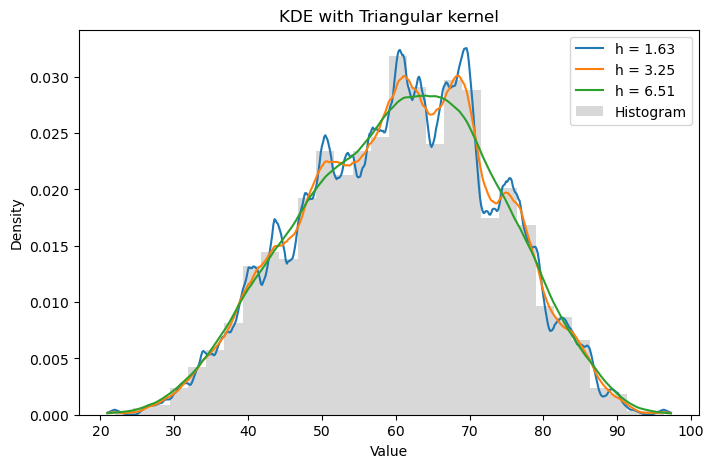

In [61]:
from scipy.stats import norm

def gaussian_kernel(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def epanechnikov_kernel(u):
    return 0.75 * (1 - u**2) * (abs(u) <= 1)

def uniform_kernel(u):
    return 0.5 * (abs(u) <= 1)

def triangular_kernel(u):
    return (1 - abs(u)) * (abs(u) <= 1)

kernels = {
    "Gaussian": gaussian_kernel,
    "Epanechnikov": epanechnikov_kernel,
    "Uniform": uniform_kernel,
    "Triangular": triangular_kernel
}
def kde(x, z_grid, h, kernel="Gaussian"):
    k = kernels[kernel]
    N = len(x)
    densities = np.zeros_like(z_grid, dtype=float)
    
    for i, z in enumerate(z_grid):
        u = (x - z) / h
        densities[i] = np.mean(k(u)) / h
    return densities
def plug_in_bandwidth(x):
    sigma = np.std(x, ddof=1)
    N = len(x)
    return 1.06 * sigma * N ** (-1/5)
def plot_kde(x, h_values, kernel="Gaussian"):
    z_grid = np.linspace(np.min(x) - 1, np.max(x) + 1, 500)
    
    plt.figure(figsize=(8,5))
    for h in h_values:
        density = kde(x, z_grid, h, kernel)
        plt.plot(z_grid, density, label=f"h = {h:.2f}")
    
    plt.hist(x, bins=30, density=True, alpha=0.3, color='gray', label="Histogram")
    plt.title(f"KDE with {kernel} kernel")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
import pandas as pd

df = pd.read_csv("data/metabric.csv")
x = df["Age at Diagnosis"].dropna().values

h_opt = plug_in_bandwidth(x)
h_values = [h_opt/2, h_opt, h_opt*2]  # smaller, plug-in, larger

# Plot KDEs for Gaussian kernel
plot_kde(x, h_values, kernel="Gaussian")
# You can repeat for other kernels
plot_kde(x, h_values, kernel="Epanechnikov")
plot_kde(x, h_values, kernel="Uniform")
plot_kde(x, h_values, kernel="Triangular")


They seem to over fit when the h value is low and then underfit when its high. This matches what we discussed in class, lower h values will tend to overreact to changes and not rely on the model while higher h values over rely on the model and therefore don't react enough to the changes in the data.